# Indentificar fronteras no lineales

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [1]:
from sklearn.datasets.samples_generator import make_circles, make_blobs

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
X, Y = make_circles(100, factor = .1, noise = .1) 

In [4]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

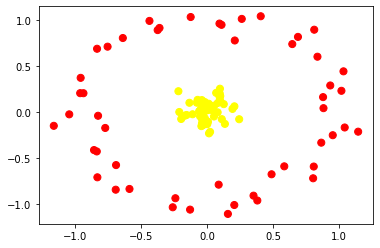

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

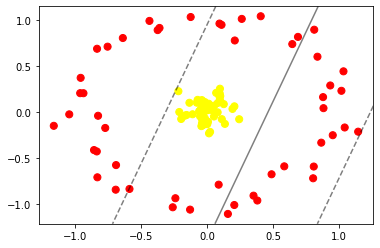

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [7]:
r = np.exp(-(X**2).sum(1))
r

array([0.32628642, 0.98383443, 0.99501361, 0.99733192, 0.52419807,
       0.95371192, 0.39508307, 0.33573169, 0.3824815 , 0.38051704,
       0.96209822, 0.96480218, 0.95147526, 0.98331146, 0.97679712,
       0.90710022, 0.28803343, 0.97888552, 0.38280632, 0.33653145,
       0.98138736, 0.98834282, 0.99539813, 0.95696248, 0.98267652,
       0.99624814, 0.53246418, 0.97276349, 0.40467995, 0.97799053,
       0.30416368, 0.35238682, 0.99884203, 0.96531822, 0.96079832,
       0.39322521, 0.98754186, 0.41412516, 0.31990995, 0.99946767,
       0.99686934, 0.99192895, 0.93615214, 0.92927369, 0.32005786,
       0.34091139, 0.25640103, 0.95401764, 0.9706873 , 0.38400798,
       0.99507282, 0.97487196, 0.34834558, 0.9961358 , 0.2535743 ,
       0.99976712, 0.31147856, 0.44861269, 0.36528424, 0.97467054,
       0.37753015, 0.99342942, 0.44594629, 0.42197072, 0.98417095,
       0.50055114, 0.34978136, 0.95697412, 0.45705926, 0.99899889,
       0.32085364, 0.99776505, 0.99474878, 0.34308948, 0.40432

In [8]:
from mpl_toolkits import mplot3d

In [9]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s= 50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

In [10]:
from ipywidgets import interact, fixed

In [11]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150, 180], 
         X = fixed(X), Y = fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 1.04478739e+00, -1.68520046e-01],
       [ 8.22797196e-02,  9.76099898e-02],
       [-5.21565320e-02, -4.77342956e-02],
       [-2.95311033e-02, -4.24212048e-02],
       [ 2.11129506e-01,  7.75441811e-01],
       [ 2.37710347e-02, -2.16399085e-01],
       [-3.73859032e-01,  8.88194039e-01],
       [-1.04439898e+00, -2.59566296e-02],
       [ 6.47179628e-01,  7.36365076e-01],
       [-9.61596468e-01,  2.03854265e-01],
       [ 1.93767481e-01,  3.30589543e-02],
       [ 9.60467387e-02,  1.63117175e-01],
       [ 9.67372737e-02,  2.00956435e-01],
       [-3.78539138e-02, -1.24082428e-01],
       [ 1.27517549e-01,  8.49445537e-02],
       [-2.16520421e-01,  2.24991665e-01],
       [ 4.07882339e-01,  1.03841742e+00],
       [-3.09321246e-02, -1.42771792e-01],
       [-3.59798361e-01,  9.11466532e-01],
       [ 2.64040087e-01,  1.00962691e+00],
       [ 1.12615120e-01, -7.81400428e-02],
       [-1.55827254e-02,  1.07157994e-01],
       

In [12]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0)

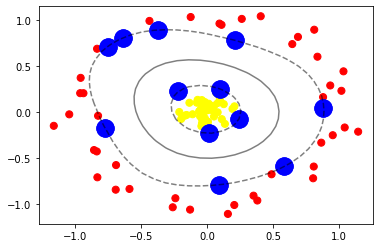

In [13]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")

# Ajustar los parámetros de SVM

In [14]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=1.2)

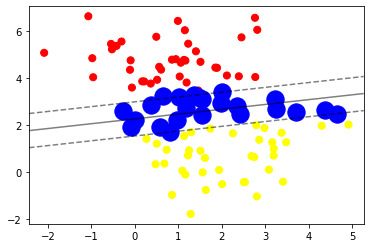

In [15]:
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=10)
model.fit(X,Y)
plt_svc(model)

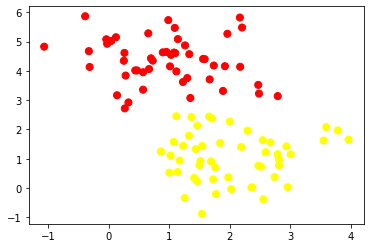

In [16]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")

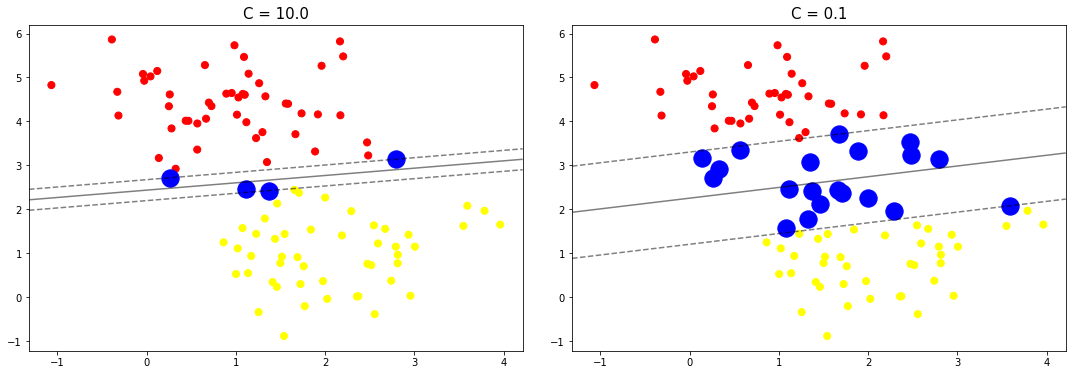

In [17]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)